# Module 10: Logscale

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference.**

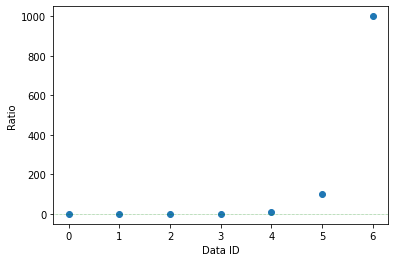

In [7]:
X = np.arange(len(ratio))

# Implemend
plt.scatter(X,ratio)
plt.ylabel('Ratio')
plt.xlabel('Data ID')
plt.axhline(y=ratio[0],color='g', linestyle=':', linewidth=0.5)

**Q: Is this a good visualization of the ratio data? Why? Why not? Explain.**

In [ ]:
#As Y axis is not showing correct ratios, for me it feels like it is not a good one. May be we can use log scalling for Y axis 

**Q: Can you fix it?**

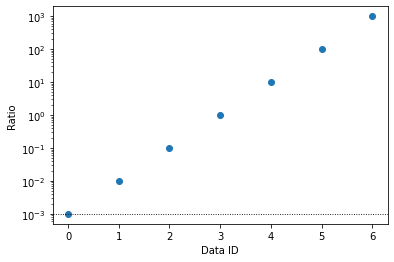

In [9]:
# Implement
X = np.arange(len(ratio))

# Implement
plt.scatter(X,ratio)
plt.ylabel('Ratio')
plt.xlabel('Data ID')
plt.yscale('log')
plt.axhline(y=ratio[0],color='k', linestyle=':', linewidth=0.9)

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`.**

In [11]:
# TODO: Implement the functionality mentioned above 
# The following code is just a dummy. You should load the correct dataset from vega_datasets package. 
#movies = pd.DataFrame({"Worldwide_Gross": np.random.sample(200), "IMDB_Rating": np.random.sample(200)})
movies = vega_datasets.data.movies()
print(len(movies))
movies = movies.dropna(subset=['IMDB_Rating','Rotten_Tomatoes_Rating','IMDB_Votes'])
print(len(movies))

3201
2260


If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed.**

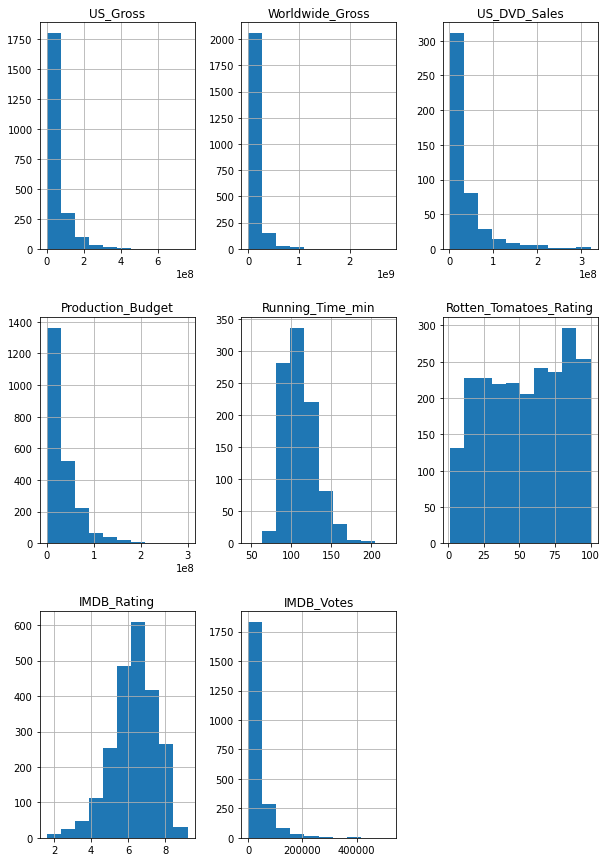

In [13]:
# Implement
movies.hist(figsize=(10,15))
plt.show()


As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

Text(0, 0.5, 'Frequency')

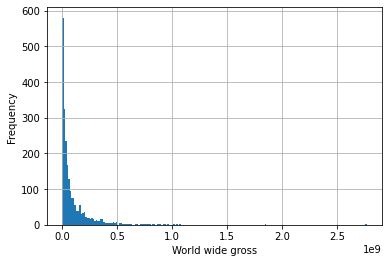

In [14]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. How about changing the vertical scale to logarithmic scale?

Text(0, 0.5, 'Frequency')

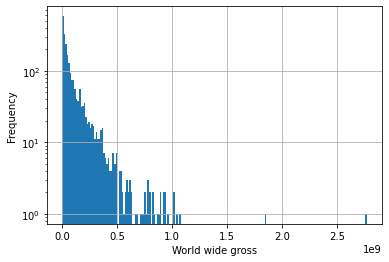

In [15]:
ax = movies["Worldwide_Gross"].hist(bins=200)
ax.set_yscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


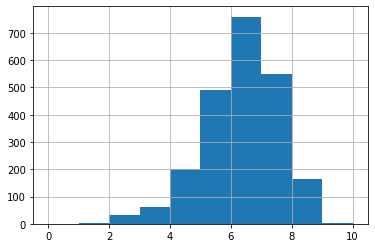

In [16]:
movies["IMDB_Rating"].hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [17]:
min(movies["Worldwide_Gross"])

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [18]:
movies["Worldwide_Gross"] = movies["Worldwide_Gross"]+1.0

In [19]:
# TODO: Replace the dummy value of bins using np.logspace.  
# Create 20 bins that cover the whole range of the dataset. 
#bins = [1.0, 2.0, 4.0]
#bins
strt=np.log2(min(movies["Worldwide_Gross"]))
stp=np.log2(max(movies["Worldwide_Gross"]))
bins=np.logspace(strt,stp,num=20,base=2.0)
bins

array([1.00000000e+00, 3.14018485e+00, 9.86076088e+00, 3.09646119e+01,
       9.72346052e+01, 3.05334634e+02, 9.58807191e+02, 3.01083182e+03,
       9.45456845e+03, 2.96890926e+04, 9.32292387e+04, 2.92757043e+05,
       9.19311230e+05, 2.88680720e+06, 9.06510822e+06, 2.84661155e+07,
       8.93888645e+07, 2.80697558e+08, 8.81442219e+08, 2.76789150e+09])

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

Text(0, 0.5, 'Frequency')

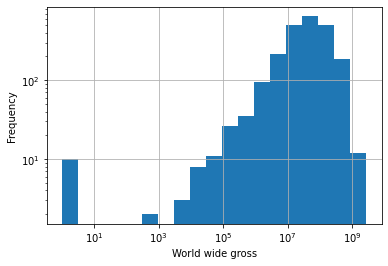

In [20]:
ax = (movies["Worldwide_Gross"]+1.0).hist(bins=bins)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Frequency")

What is going on? Is this the right plot?

**Q: explain and fix**

Text(0, 0.5, 'Probability density')

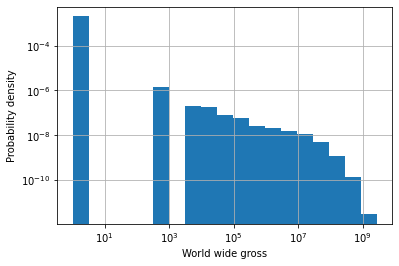

In [21]:
# Implement
ax = (movies["Worldwide_Gross"]+1.0).hist(bins=bins,density=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("World wide gross")
ax.set_ylabel("Probability density")

**Q: Can you explain the plot? Why are there gaps?**

In [23]:
#Ans: We can see certain gaps in bins because there are very few or no movies which falls under the bin range for worldwide gross income.

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. For a given value x, CCDF(x) is the number (fraction) of data points that are same or larger than x. To write code to draw CCDF, it'll be helpful to draw it by hand by using a very small, toy dataset. Draw it by hand and then think about how each point in the CCDF plot can be computed. 

**Q: Draw a CCDF of worldwide gross data in log-log scale**

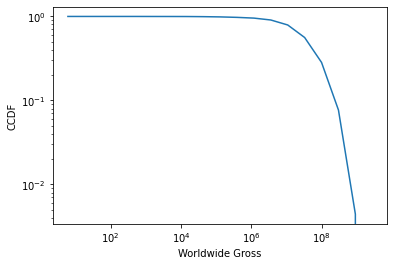

In [24]:
# TODO: Implement functionality mentioned above
# You must replace the dummy values with the correct code. 
#worldgross_sorted = np.random.sample(200)
#Y = np.random.sample(200)
strt=np.log10(min(movies["Worldwide_Gross"]+1.0))
stp=np.log10(max(movies["Worldwide_Gross"]))
bins=np.logspace(strt,stp,num=20,base=10.0)
count, bins_count = np.histogram(movies["Worldwide_Gross"]+1.0, bins=bins)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
ccdf = 1-cdf

plt.plot(bins_count[1:],ccdf)
plt.xlabel('Worldwide Gross')
plt.ylabel('CCDF')
plt.yscale('log')
plt.xscale('log')
plt.show()

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

In [26]:
worldgross_sorted=np.sort(bins_count[1:])
Y=ccdf

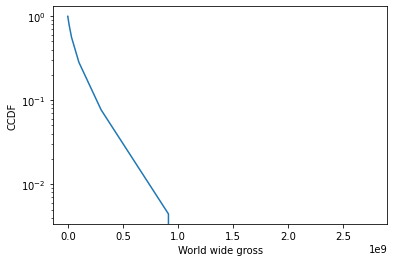

In [27]:
plt.xlabel("World wide gross")
plt.ylabel("CCDF")
plt.plot(worldgross_sorted,Y)
plt.yscale('log')

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [28]:
# Implement
idx=movies['Worldwide_Gross'].idxmax(axis=0,skipna=True)
movies.loc[idx]

Title                                  Avatar
US_Gross                          760167650.0
Worldwide_Gross                  2767891500.0
US_DVD_Sales                      146153933.0
Production_Budget                 237000000.0
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                   83.0
IMDB_Rating                               8.3
IMDB_Votes                           261439.0
Name: 1234, dtype: object

In [29]:
%shell jupyter nbconvert --to html /content/m10_lab.ipynb 

[NbConvertApp] Converting notebook /content/m10_lab.ipynb to html
[NbConvertApp] Writing 431572 bytes to /content/m10_lab.html
